In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline


In [3]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
28*28

784

In [28]:
X_train = df_train.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values

X_test = df_test.iloc[:, 1:].values/255
y_test = df_test.iloc[:, 0].values

In [9]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

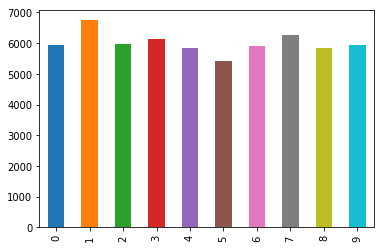

In [12]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_train.flatten().shape

(47040000,)

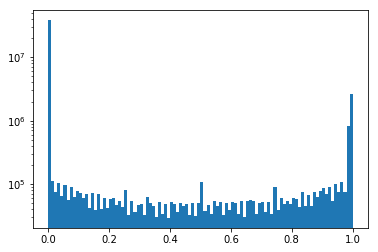

In [29]:
plt.hist(X_train.flatten(), bins = 100, log = True);

In [30]:
pd.Series(X_train.flatten()).describe()

count    4.704000e+07
mean     1.306605e-01
std      3.081078e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

In [26]:
a = X_train.flatten()

In [27]:
len(a[a == 0])/len(a)

0.8087977040816327

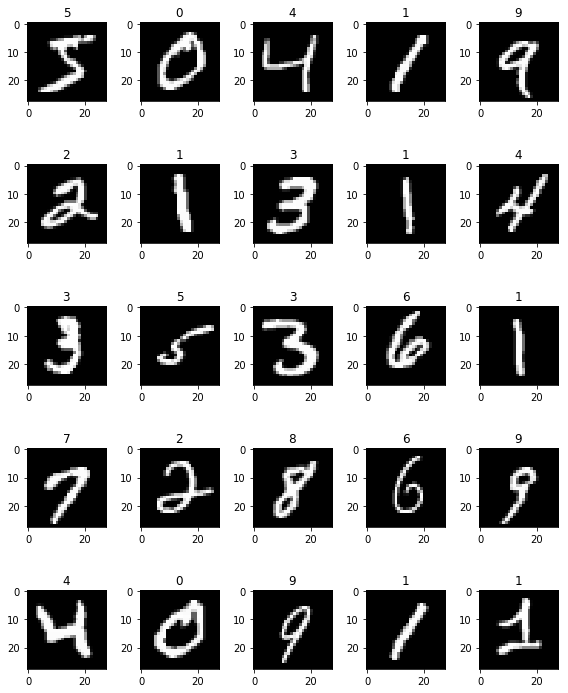

In [31]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28,28)), cmap = "gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

In [50]:
%%time 

est = linear_model.SGDClassifier(n_jobs=12, tol=1e-5, eta0 = 0.15, loss = "log",
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 1000)
est.fit(X_train, y_train)

CPU times: user 1min 48s, sys: 242 ms, total: 1min 48s
Wall time: 19.2 s


In [51]:
est.score(X_test, y_test)

0.8984

In [36]:
y_test_pred = est.predict(X_test)

In [45]:
summary = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
summary = summary[summary.actual != summary.prediction]
summary = summary.groupby(["actual", "prediction"]).actual.count().unstack()

In [42]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution of misclassifications')

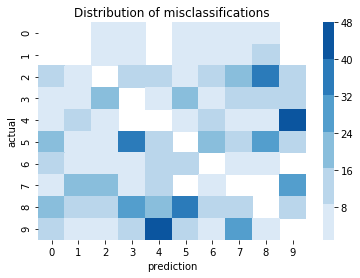

In [47]:
sns.heatmap(summary, cmap=sns.color_palette("Blues"))
plt.title("Distribution of misclassifications")

In [52]:
y_test_prob = est.predict_proba(X_test)

In [54]:
y_test_prob.shape

(10000, 10)

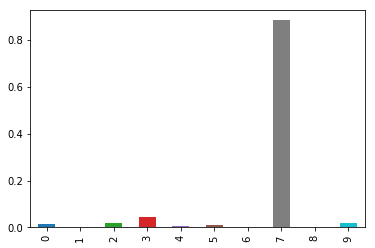

In [56]:
pd.Series(y_test_prob[0]).plot.bar()

In [57]:
y_test[0]

7

In [58]:
y_test_prob[0]

array([1.50492544e-02, 8.12225625e-04, 1.88677478e-02, 4.48078962e-02,
       4.11233327e-03, 9.65163647e-03, 6.53590416e-04, 8.82816869e-01,
       2.45471858e-03, 2.07737282e-02])

In [75]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
Y_train.shape

(60000, 10)

In [59]:
import keras

Using TensorFlow backend.


In [77]:
model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape = (784,), dtype = "float32"))

model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

model.compile(optimizer = "adam"
              , metrics = ["accuracy"]
              , loss = keras.losses.categorical_crossentropy)

model.fit(X_train, Y_train
          , batch_size = 64
          , validation_data = (X_test, Y_test)
          , epochs = 10, verbose = 0 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [85]:
y_test_pred = model.predict_classes(X_test)
print(y_test_pred.shape)

(10000,)


In [79]:
from sklearn import metrics

In [86]:
metrics.accuracy_score(y_test, y_test_pred)

0.9261

In [87]:
y_test_prob = model.predict(X_test)
y_test_prob[:, :5]

array([[2.60366437e-06, 1.68265159e-11, 7.78254889e-06, 5.16264839e-03,
        3.54067424e-07],
       [2.82036606e-04, 2.63367815e-06, 9.91626382e-01, 2.47952790e-04,
        4.46539710e-14],
       [1.68326267e-06, 9.74585354e-01, 1.49081545e-02, 3.23255174e-03,
        1.57270057e-04],
       ...,
       [1.43334722e-08, 1.20380816e-08, 6.11392625e-06, 4.59182957e-05,
        9.71113861e-01],
       [1.83433201e-07, 3.27881907e-07, 4.03953692e-07, 2.02783511e-07,
        1.22422298e-05],
       [8.49576338e-07, 2.00455226e-14, 3.62014325e-05, 5.20681009e-09,
        1.33262233e-07]], dtype=float32)